Populating the interactive namespace from numpy and matplotlib
Color: (248, 216, 7)


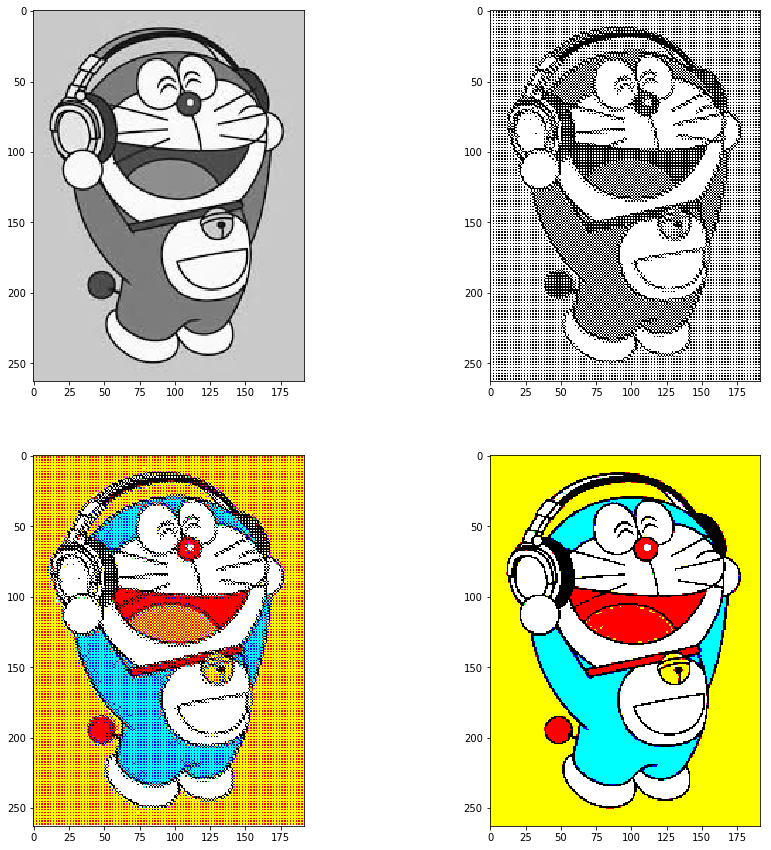

In [27]:
from PIL import Image
import cv2
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def open_image(path):
    newImage = Image.open(path)
    return newImage

# Save Image
def save_image(image, path):
    image.save(path, 'png')


# Create a new image with the given size
def create_image(i, j):
    image = Image.new("RGB", (i, j), "white")
    return image


# Get the pixel from the given image
def get_pixel(image, i, j):
  # Inside image bounds?
    width, height = image.size
    if i > width or j > height:
        return None

  # Get Pixel
    pixel = image.getpixel((i, j))
    return pixel

# Create a Grayscale version of the image
def convert_grayscale(image):
  # Get size
    width, height = image.size

  # Create new Image and a Pixel Map
    new = create_image(width, height)
    pixels = new.load()

  # Transform to grayscale
    for i in range(width):
        for j in range(height):
      # Get Pixel
            pixel = get_pixel(image, i, j)

      # Get R, G, B values (This are int from 0 to 255)
            red =   pixel[0]
            green = pixel[1]
            blue =  pixel[2]

      # Transform to grayscale
            gray = (red * 0.299) + (green * 0.587) + (blue * 0.114)

      # Set Pixel in new image
            pixels[i, j] = (int(gray), int(gray), int(gray))

  # Return new image
    return new


# Create a Half-tone version of the image
def convert_halftoning(image):
  # Get size
    width, height = image.size

  # Create new Image and a Pixel Map
    new = create_image(width, height)
    pixels = new.load()

  # Transform to half tones
    for i in range(0, (width-1), 2):
        for j in range(0, (height-1), 2):
      # Get Pixels
            p1 = get_pixel(image, i, j)
            p2 = get_pixel(image, i, j + 1)
            p3 = get_pixel(image, i + 1, j)
            p4 = get_pixel(image, i + 1, j + 1)

       # Transform to grayscale
            gray1 = (p1[0] * 0.299) + (p1[1] * 0.587) + (p1[2] * 0.114)
            gray2 = (p2[0] * 0.299) + (p2[1] * 0.587) + (p2[2] * 0.114)
            gray3 = (p3[0] * 0.299) + (p3[1] * 0.587) + (p3[2] * 0.114)
            gray4 = (p4[0] * 0.299) + (p4[1] * 0.587) + (p4[2] * 0.114)

       # Saturation Percentage
            sat = (gray1 + gray2 + gray3 + gray4) / 4

       # Draw white/black depending on saturation
            if sat > 223:
                pixels[i, j]         = (255, 255, 255) # White
                pixels[i, j + 1]     = (255, 255, 255) # White
                pixels[i + 1, j]     = (255, 255, 255) # White
                pixels[i + 1, j + 1] = (255, 255, 255) # White
            elif sat > 159:
                pixels[i, j]         = (255, 255, 255) # White
                pixels[i, j + 1]     = (0, 0, 0)       # Black
                pixels[i + 1, j]     = (255, 255, 255) # White
                pixels[i + 1, j + 1] = (255, 255, 255) # White
            elif sat > 95:
                pixels[i, j]         = (255, 255, 255) # White
                pixels[i, j + 1]     = (0, 0, 0)       # Black
                pixels[i + 1, j]     = (0, 0, 0)       # Black
                pixels[i + 1, j + 1] = (255, 255, 255) # White
            elif sat > 32:
                pixels[i, j]         = (0, 0, 0)       # Black
                pixels[i, j + 1]     = (255, 255, 255) # White
                pixels[i + 1, j]     = (0, 0, 0)       # Black
                pixels[i + 1, j + 1] = (0, 0, 0)       # Black
            else:
                pixels[i, j]         = (0, 0, 0)       # Black
                pixels[i, j + 1]     = (0, 0, 0)       # Black
                pixels[i + 1, j]     = (0, 0, 0)       # Black
                pixels[i + 1, j + 1] = (0, 0, 0)       # Black

  # Return new image
    return new


# Return color value depending on quadrant and saturation
def get_saturation(value, quadrant):
    if value > 223:
        return 255
    elif value > 159:
        if quadrant != 1:
            return 255

        return 0
    elif value > 95:
        if quadrant == 0 or quadrant == 3:
            return 255

        return 0
    elif value > 32:
        if quadrant == 1:
            return 255

        return 0
    else:
        return 0


# Create a dithered version of the image
def convert_dithering(image):
  # Get size
    width, height = image.size

  # Create new Image and a Pixel Map
    new = create_image(width, height)
    pixels = new.load()

  # Transform to half tones
    for i in range(0, (width-1), 2):
        for j in range(0, (height-1), 2):
      # Get Pixels
            p1 = get_pixel(image, i, j)
            p2 = get_pixel(image, i, j + 1)
            p3 = get_pixel(image, i + 1, j)
            p4 = get_pixel(image, i + 1, j + 1)

      # Color Saturation by RGB channel
            red   = (p1[0] + p2[0] + p3[0] + p4[0]) / 4
            green = (p1[1] + p2[1] + p3[1] + p4[1]) / 4
            blue  = (p1[2] + p2[2] + p3[2] + p4[2]) / 4

      # Results by channel
            r = [0, 0, 0, 0]
            g = [0, 0, 0, 0]
            b = [0, 0, 0, 0]

      # Get Quadrant Color
            for x in range(0, 4):
                r[x] = get_saturation(red, x)
                g[x] = get_saturation(green, x)
                b[x] = get_saturation(blue, x)

      # Set Dithered Colors
            pixels[i, j]         = (r[0], g[0], b[0])
            pixels[i, j + 1]     = (r[1], g[1], b[1])
            pixels[i + 1, j]     = (r[2], g[2], b[2])
            pixels[i + 1, j + 1] = (r[3], g[3], b[3])

  # Return new image
    return new


# Create a Primary Colors version of the image
def convert_primary(image):
  # Get size
    width, height = image.size

  # Create new Image and a Pixel Map
    new = create_image(width, height)
    pixels = new.load()

  # Transform to primary
    for i in range(width):
        for j in range(height):
      # Get Pixel
            pixel = get_pixel(image, i, j)

      # Get R, G, B values (This are int from 0 to 255)
            red =   pixel[0]
            green = pixel[1]
            blue =  pixel[2]

      # Transform to primary
            if red > 127:
                red = 255
            else:
                red = 0
            if green > 127:
                green = 255
            else:
                green = 0
            if blue > 127:
                blue = 255
            else:
                blue = 0

      # Set Pixel in new image
            pixels[i, j] = (int(red), int(green), int(blue))

  # Return new image
    return new


# Main
if __name__ == "__main__":
    # Load Image (JPEG/JPG needs libjpeg to load)
    original = open_image('download1.jpg')
    # Example Pixel Color
    print('Color: ' + str(get_pixel(original, 0, 0)))
    fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,15))
  # Convert to Grayscale and save
    new1 = convert_grayscale(original)
    save_image(new1, 'Prinny_gray.png')

  # Convert to Halftoning and save
    new2 = convert_halftoning(original)
    save_image(new2, 'Prinny_half.png')
    
  # Convert to Dithering and save
    new3 = convert_dithering(original)
    save_image(new3, 'Prinny_dither.png')

  # Convert to Primary and save
    new4 = convert_primary(original)
    save_image(new4, 'Prinny_primary.png')
    ax[0,0].imshow(new1)
    ax[0,1].imshow(new2)
    ax[1,0].imshow(new3)
    ax[1,1].imshow(new4)
    plt.show()